In [1]:
#Load the Dataset:

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
 #Load the dataset from the specified file path
file_path = r'C:\Users\HP\Downloads\Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis\uber.csv'
uber_data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(uber_data.head())


First 5 rows of the dataset:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647 

In [5]:
# Display basic information about the dataset (data types, missing values, etc.)
print("\nDataset Info:")
print(uber_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


In [6]:
# Display summary statistics of the numerical columns
print("\nSummary Statistics:")
print(uber_data.describe())


Summary Statistics:
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%        

In [7]:
# Check for missing values
missing_values = uber_data.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values[missing_values > 0])



Missing Values in each column:
dropoff_longitude    1
dropoff_latitude     1
dtype: int64


In [8]:
# Check for missing values in the dataset
print("Missing values before handling:")
print(uber_data.isnull().sum())

# Remove rows with missing values
uber_data_cleaned = uber_data.dropna()

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(uber_data_cleaned.isnull().sum())

# Confirm the number of rows remaining
print("\nNumber of rows before removing missing values:", len(uber_data))
print("Number of rows after removing missing values:", len(uber_data_cleaned))


Missing values before handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Number of rows before removing missing values: 200000
Number of rows after removing missing values: 199999


In [9]:
# Remove rows with missing values
uber_data_cleaned = uber_data.dropna()


In [10]:
# Remove rows with missing values
uber_data_cleaned = uber_data.dropna().copy()  # Create an explicit copy to avoid SettingWithCopyWarning

# Convert 'pickup_datetime' to a datetime object using .loc
uber_data_cleaned.loc[:, 'pickup_datetime'] = pd.to_datetime(uber_data_cleaned['pickup_datetime'])

# Verify the conversion
print("Data type of 'pickup_datetime' after conversion:")
print(uber_data_cleaned['pickup_datetime'].dtypes)


Data type of 'pickup_datetime' after conversion:
object


# ##Explore the Dataset

In [11]:
#You should look at the statistical summary of the dataset, including the target variable (fare amount), and get an overview of the distributions of the variables.

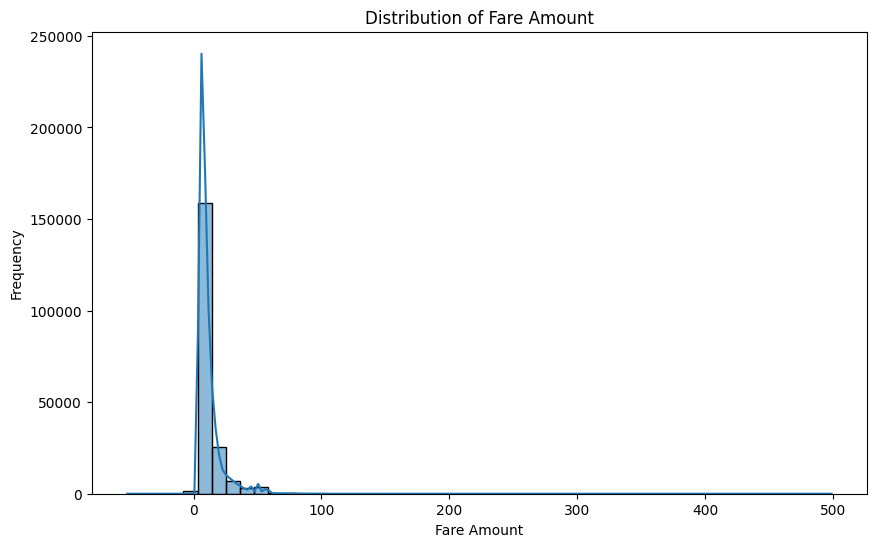

In [12]:
# Exploratory Data Analysis: fare_amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(uber_data_cleaned['fare_amount'], kde=True, bins=50)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Identify Patterns and Outliers

In [13]:
#You can now investigate potential outliers in the fare amount and explore relationships between variables, such as the relationship between distance traveled and fare.

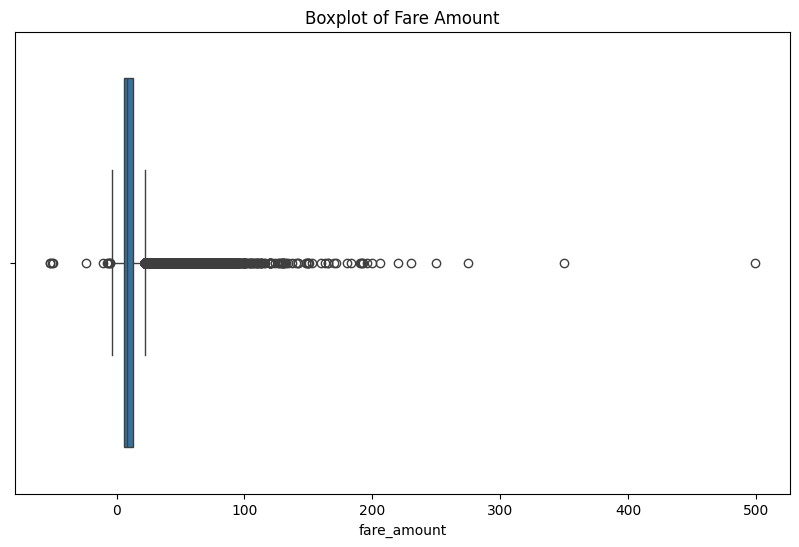

In [14]:
# Boxplot to check for outliers in fare_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=uber_data_cleaned['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

# Correlation Matrix

In [15]:
#A correlation matrix helps to identify linear relationships between the variables, which can provide insights into which features might influence the fare amount.

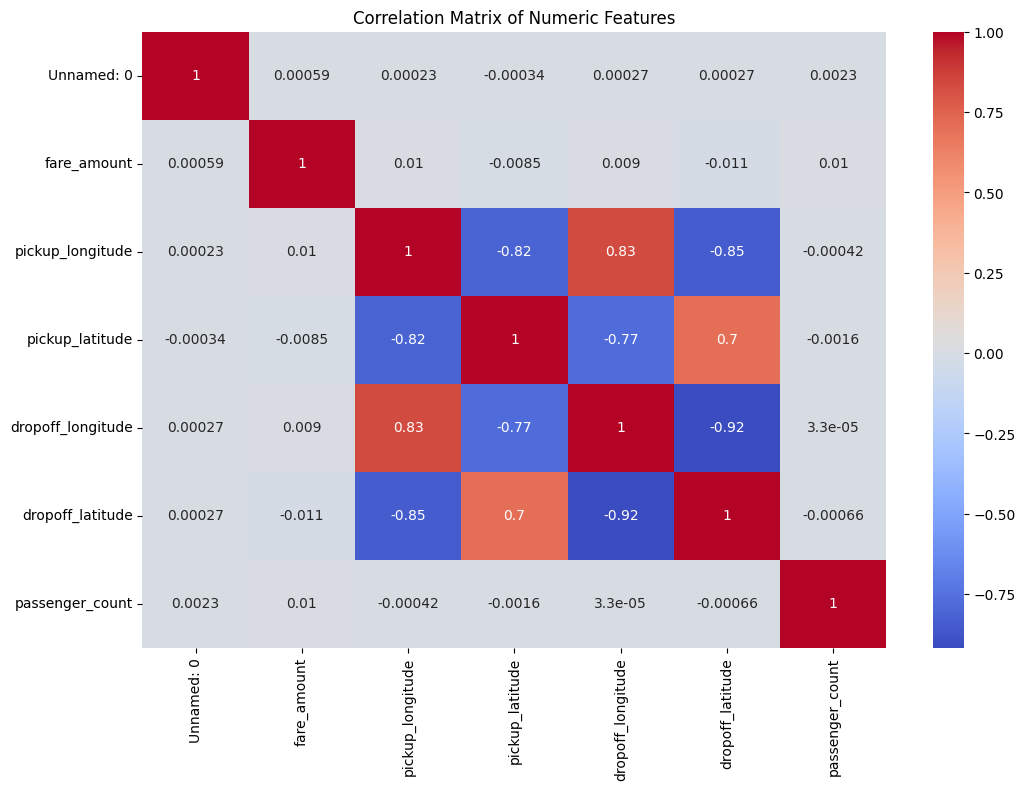

In [16]:
# Select only the numeric columns from the dataset
numeric_data = uber_data_cleaned.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


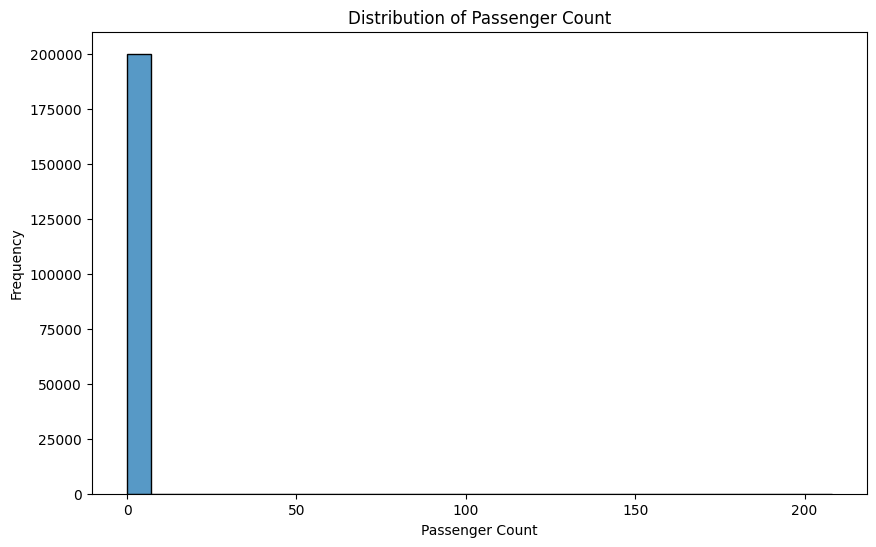

In [17]:
# Exploratory Data Analysis: passenger_count distribution
plt.figure(figsize=(10, 6))
sns.histplot(uber_data_cleaned['passenger_count'], kde=False, bins=30)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()


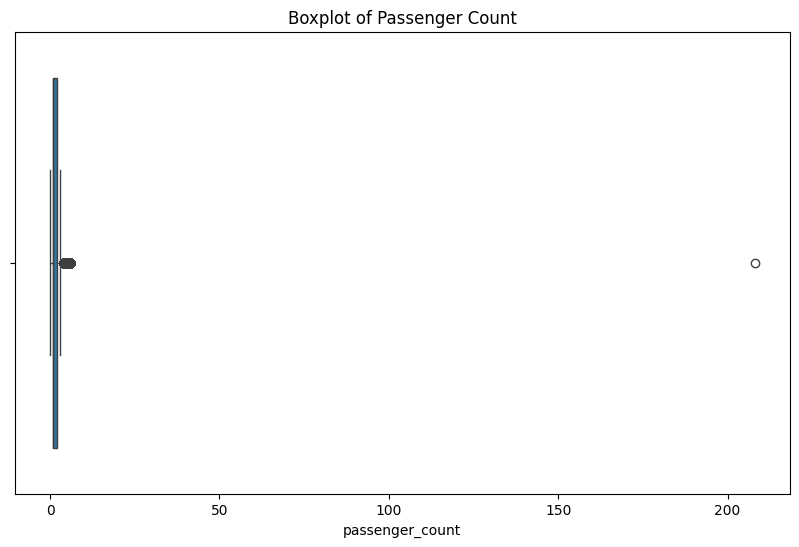

In [18]:
# Boxplot to check for outliers in passenger_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=uber_data_cleaned['passenger_count'])
plt.title('Boxplot of Passenger Count')
plt.show()


In [19]:
# Convert 'pickup_datetime' to datetime format
uber_data_cleaned['pickup_datetime'] = pd.to_datetime(uber_data_cleaned['pickup_datetime'], errors='coerce')

# Now, extract the hour and day of the week
uber_data_cleaned['pickup_hour'] = uber_data_cleaned['pickup_datetime'].dt.hour
uber_data_cleaned['pickup_day_of_week'] = uber_data_cleaned['pickup_datetime'].dt.dayofweek

# Verify the new features
print(uber_data_cleaned[['pickup_datetime', 'pickup_hour', 'pickup_day_of_week']].head())


            pickup_datetime  pickup_hour  pickup_day_of_week
0 2015-05-07 19:52:06+00:00           19                   3
1 2009-07-17 20:04:56+00:00           20                   4
2 2009-08-24 21:45:00+00:00           21                   0
3 2009-06-26 08:22:21+00:00            8                   4
4 2014-08-28 17:47:00+00:00           17                   3


# Handle Missing or Incorrect Data

In [20]:
#Before moving forward with feature engineering and model building, it’s important to handle missing or incorrect data:

In [21]:
# Handling missing data
print("Missing values:\n", uber_data_cleaned.isnull().sum())

# Drop rows with missing fare_amount or other important fields
uber_data_cleaned = uber_data_cleaned.dropna(subset=['fare_amount'])

# Fill or handle missing values in other features if necessary


Missing values:
 Unnamed: 0            0
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_day_of_week    0
dtype: int64


# Gain Insights

In [22]:
#Look for patterns and relationships in the data. For example, you may want to examine how time of day (pickup hour) or day of the week influences the fare amount.

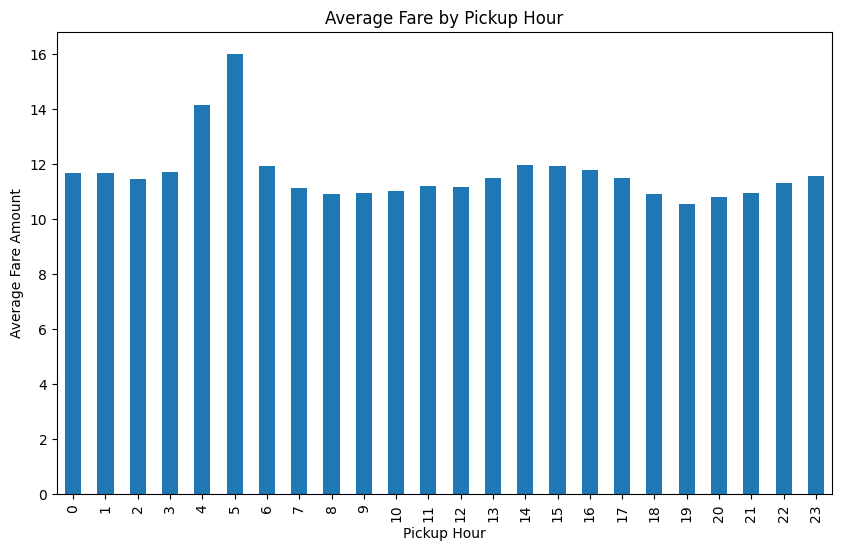

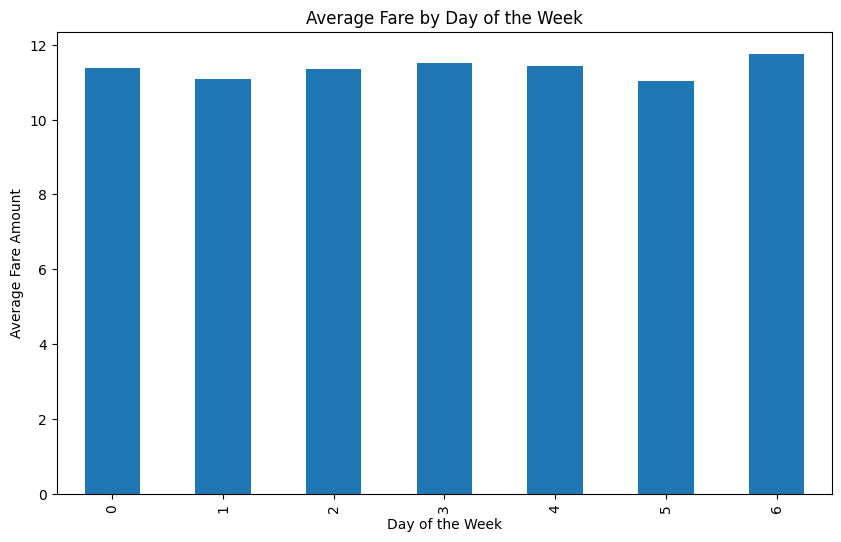

In [23]:
# Group by hour to see fare trends by time of day
if 'pickup_hour' in uber_data_cleaned.columns:
    hourly_fare = uber_data_cleaned.groupby('pickup_hour')['fare_amount'].mean()
    plt.figure(figsize=(10, 6))
    hourly_fare.plot(kind='bar')
    plt.title('Average Fare by Pickup Hour')
    plt.xlabel('Pickup Hour')
    plt.ylabel('Average Fare Amount')
    plt.show()

# Group by day of the week to see fare trends by day
if 'pickup_day_of_week' in uber_data_cleaned.columns:
    daily_fare = uber_data_cleaned.groupby('pickup_day_of_week')['fare_amount'].mean()
    plt.figure(figsize=(10, 6))
    daily_fare.plot(kind='bar')
    plt.title('Average Fare by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Fare Amount')
    plt.show()


In [24]:
#Handle Date or String Columns

In [25]:
# Convert 'pickup_datetime' to datetime and extract relevant features if not done already
uber_data_cleaned['pickup_datetime'] = pd.to_datetime(uber_data_cleaned['pickup_datetime'], errors='coerce')
uber_data_cleaned['pickup_hour'] = uber_data_cleaned['pickup_datetime'].dt.hour
uber_data_cleaned['pickup_day_of_week'] = uber_data_cleaned['pickup_datetime'].dt.dayofweek


# 2-Handle Missing Data

In [26]:
#Identify Missing Data
# Check for missing values in the dataset
missing_data = uber_data_cleaned.isnull().sum()

# Display the columns with missing values
print("Missing values:\n", missing_data[missing_data > 0])

# Percentage of missing values for each column
missing_percentage = (missing_data / len(uber_data_cleaned)) * 100
print("Percentage of missing values:\n", missing_percentage[missing_percentage > 0])


Missing values:
 Series([], dtype: int64)
Percentage of missing values:
 Series([], dtype: float64)


In [27]:
#Analyze the Impact of Missing Data
#Imputation or Removal
# Drop rows with missing values
uber_data_cleaned_dropped = uber_data_cleaned.dropna()

# Check the shape after dropping rows
print(f"Original data shape: {uber_data_cleaned.shape}")
print(f"Data shape after dropping rows with missing values: {uber_data_cleaned_dropped.shape}")


Original data shape: (199999, 11)
Data shape after dropping rows with missing values: (199999, 11)


In [28]:
#Imputation
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns with the mean
numeric_columns = uber_data_cleaned.select_dtypes(include=[float, int]).columns
imputer = SimpleImputer(strategy='mean')
uber_data_cleaned[numeric_columns] = imputer.fit_transform(uber_data_cleaned[numeric_columns])

# Verify imputation
print(uber_data_cleaned.isnull().sum())


Unnamed: 0            0
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_day_of_week    0
dtype: int64


In [29]:
# Impute missing values in categorical columns with the most frequent category
categorical_columns = uber_data_cleaned.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
uber_data_cleaned[categorical_columns] = imputer.fit_transform(uber_data_cleaned[categorical_columns])

# Verify imputation
print(uber_data_cleaned.isnull().sum())


Unnamed: 0            0
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_day_of_week    0
dtype: int64


In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Assuming 'uber_data_cleaned' is your DataFrame
# Select only numeric columns for imputation
numeric_columns = uber_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
uber_data_numeric = uber_data_cleaned[numeric_columns]

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the numeric data
uber_data_imputed = imputer.fit_transform(uber_data_numeric)

# Create a DataFrame with the imputed data
uber_data_imputed_df = pd.DataFrame(uber_data_imputed, columns=numeric_columns)

# Optionally, you can concatenate it back with the non-numeric columns
non_numeric_columns = uber_data_cleaned.select_dtypes(exclude=['float64', 'int64']).columns
uber_data_cleaned_imputed = pd.concat([uber_data_imputed_df, uber_data_cleaned[non_numeric_columns].reset_index(drop=True)], axis=1)

# Verify imputation
print(uber_data_cleaned_imputed.isnull().sum())


Unnamed: 0            0
fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_day_of_week    0
key                   0
pickup_datetime       0
dtype: int64


In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Now you can use IterativeImputer as expected
imputer = IterativeImputer(max_iter=10, random_state=0)


In [32]:
# Drop rows with missing values
uber_data_cleaned_imputed.dropna(inplace=True)

# Verify no missing values remain
print(uber_data_cleaned_imputed.isnull().sum())


Unnamed: 0            0
fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_day_of_week    0
key                   0
pickup_datetime       0
dtype: int64


In [33]:
print(f"Dataset shape after dropping missing rows: {uber_data_cleaned_imputed.shape}")


Dataset shape after dropping missing rows: (199999, 11)


In [34]:
#Reevaluate Dataset after Handling Missing Data
# Final check for missing values
print("Missing values after handling:\n", uber_data_cleaned.isnull().sum())


Missing values after handling:
 Unnamed: 0            0
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_day_of_week    0
dtype: int64


In [35]:
#Drop Unnecessary Columns:
# Drop unnecessary columns
uber_data_cleaned = uber_data_cleaned.drop(columns=['Unnamed: 0', 'key'])


In [36]:
# Check for duplicates
print(f"Duplicate rows: {uber_data_cleaned.duplicated().sum()}")

# Drop duplicates if any
uber_data_cleaned = uber_data_cleaned.drop_duplicates()


Duplicate rows: 0


# Feature Engineering

In [37]:
#Time of Day:
#You can categorize pickup_hour into different periods like morning, afternoon, evening, and night. This could help capture variations in fares based on the time of day.

In [38]:
# Define time of day categories
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_of_day'
uber_data_cleaned_imputed['time_of_day'] = uber_data_cleaned_imputed['pickup_hour'].apply(time_of_day)

# Verify the new feature
print(uber_data_cleaned_imputed['time_of_day'].value_counts())


time_of_day
Night        56068
Morning      50117
Afternoon    47624
Evening      46190
Name: count, dtype: int64


In [39]:
#Trip Distance:
#Calculate the distance between the pickup and dropoff locations using the haversine formula. This feature can have a strong impact on fare prediction.

In [40]:
from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    R = 6371.0  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Apply haversine to calculate distance for each trip
uber_data_cleaned_imputed['trip_distance_km'] = uber_data_cleaned_imputed.apply(
    lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                          row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Verify the new feature
print(uber_data_cleaned_imputed['trip_distance_km'].describe())


count    199999.000000
mean         20.855350
std         382.964642
min           0.000000
25%           1.215222
50%           2.120992
75%           3.875169
max       16409.239135
Name: trip_distance_km, dtype: float64


In [41]:
#Distance Categories:
#You can further categorize the trip distances into bins like short, medium, and long to identify patterns in fare prices by distance.

In [42]:
# Define distance categories
def distance_category(distance):
    if distance < 2:
        return 'Short'
    elif 2 <= distance < 10:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create a new column 'distance_category'
uber_data_cleaned_imputed['distance_category'] = uber_data_cleaned_imputed['trip_distance_km'].apply(distance_category)

# Verify the new feature
print(uber_data_cleaned_imputed['distance_category'].value_counts())


distance_category
Medium    95383
Short     94334
Long      10282
Name: count, dtype: int64


In [43]:
#Interaction Features:
#Sometimes combining features like trip_distance and time_of_day might reveal hidden patterns. For example, you could create interaction terms between trip_distance_km and time_of_day.

In [44]:
# Interaction between distance and time of day
uber_data_cleaned_imputed['distance_time_interaction'] = uber_data_cleaned_imputed['trip_distance_km'] * uber_data_cleaned_imputed['pickup_hour']


In [47]:
#time_of_day:

#Categories:
#Night: 56,068 instances
#Morning: 50,117 instances
#Afternoon: 47,624 instances
#Evening: 46,189 instances
##trip_distance_km:
#
#Mean: 20.86 km
#Standard deviation: 382.97 km (indicating a wide range of distances, including some very high values)
#Minimum: 0 km
#Maximum: 16,409.24 km (very high outlier)
#distance_category:

#Categories:
#Medium: 95,382 instances
#Short: 94,334 instances
#Long: 10,282 instances

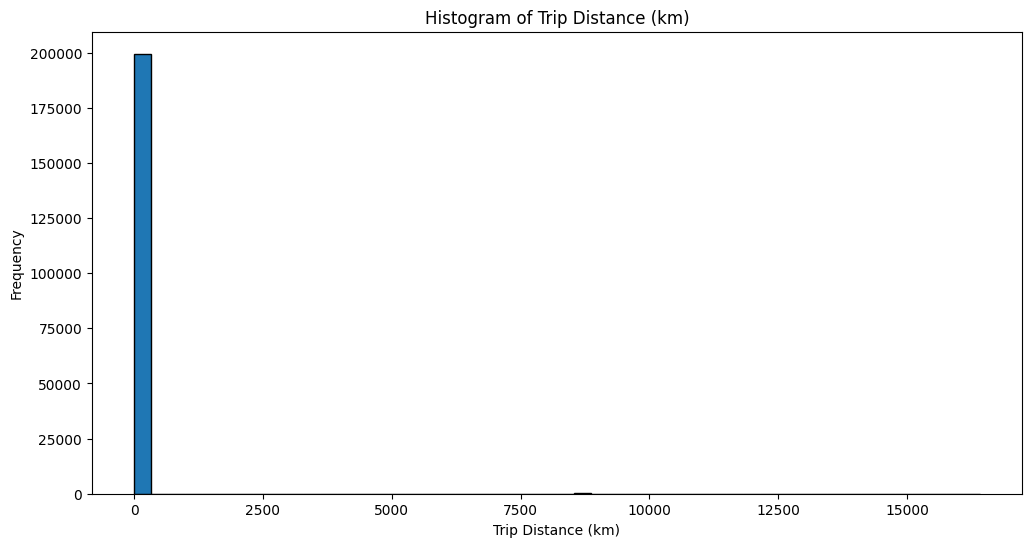

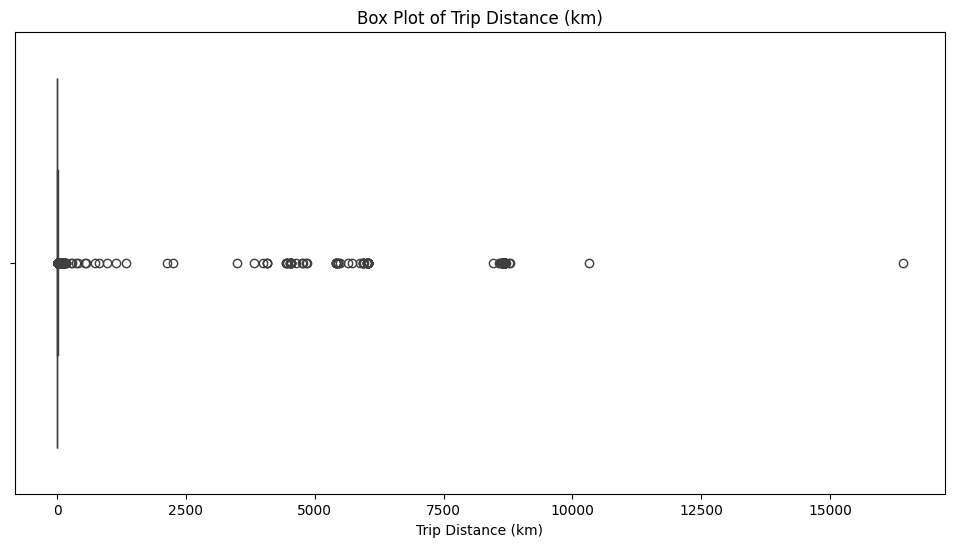

In [48]:
#Visual Inspection
#Outlier Handling:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(uber_data_cleaned_imputed['trip_distance_km'], bins=50, edgecolor='k')
plt.title('Histogram of Trip Distance (km)')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=uber_data_cleaned_imputed['trip_distance_km'])
plt.title('Box Plot of Trip Distance (km)')
plt.xlabel('Trip Distance (km)')
plt.show()


In [49]:
#Clipping Extreme Values
#Determine thresholds for extreme values and clip them to a maximum or minimum value
# Define clipping thresholds
lower_bound = uber_data_cleaned_imputed['trip_distance_km'].quantile(0.01)  # 1st percentile
upper_bound = uber_data_cleaned_imputed['trip_distance_km'].quantile(0.99)  # 99th percentile

# Clip the values
uber_data_cleaned_imputed['trip_distance_km'] = uber_data_cleaned_imputed['trip_distance_km'].clip(lower=lower_bound, upper=upper_bound)


In [50]:
#Log Transformation
#Apply a log transformation to reduce the impact of large outliers.
import numpy as np

# Apply log transformation (add a small constant to avoid log(0))
uber_data_cleaned_imputed['log_trip_distance_km'] = np.log1p(uber_data_cleaned_imputed['trip_distance_km'])


In [51]:
#Investigate Outliers
#Investigate the rows with extreme values to understand their causes. This can provide insights into whether these outliers are errors or genuine extreme cases
# Find rows with extreme values
outliers = uber_data_cleaned_imputed[(uber_data_cleaned_imputed['trip_distance_km'] > upper_bound) |
                                     (uber_data_cleaned_imputed['trip_distance_km'] < lower_bound)]
print(outliers.head())


Empty DataFrame
Columns: [Unnamed: 0, fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, pickup_hour, pickup_day_of_week, key, pickup_datetime, time_of_day, trip_distance_km, distance_category, distance_time_interaction, log_trip_distance_km]
Index: []


In [52]:
 #Verify and Continue:
#Double-Check Thresholds: Ensure that the thresholds for clipping or identifying outliers are appropriate. You might need to adjust the percentile values or review the range of your data.
# Check the thresholds
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Verify the range of trip_distance_km
print(f"Min value: {uber_data_cleaned_imputed['trip_distance_km'].min()}")
print(f"Max value: {uber_data_cleaned_imputed['trip_distance_km'].max()}")


Lower bound: 0.0
Upper bound: 20.72202016378241
Min value: 0.0
Max value: 20.72202016378241


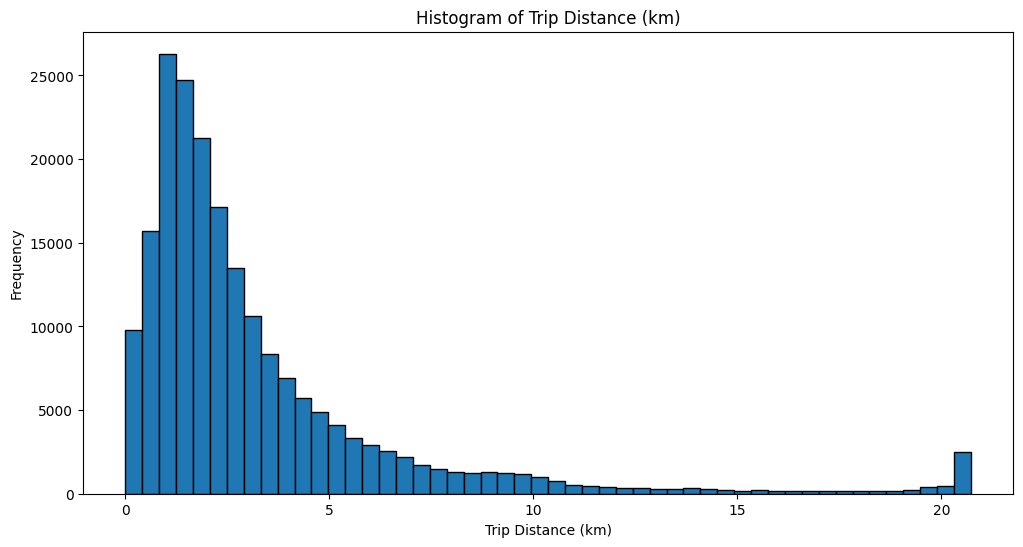

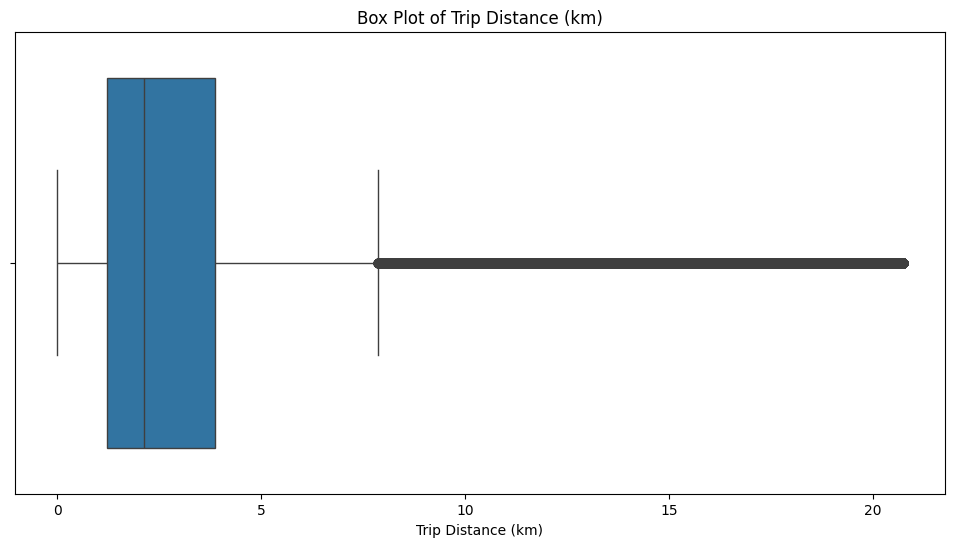

In [54]:
#Review Data Distribution: Plot the histogram and box plot again to visually inspect the distribution and verify if there are any anomalies.
# Re-plot histogram and box plot
plt.figure(figsize=(12, 6))
plt.hist(uber_data_cleaned_imputed['trip_distance_km'], bins=50, edgecolor='k')
plt.title('Histogram of Trip Distance (km)')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=uber_data_cleaned_imputed['trip_distance_km'])
plt.title('Box Plot of Trip Distance (km)')
plt.xlabel('Trip Distance (km)')
plt.show()


In [55]:
#Log Transformation: If the data distribution is highly skewed, applying a log transformation might still be beneficial even if outliers are not apparent
    # Apply log transformation
uber_data_cleaned_imputed['log_trip_distance_km'] = np.log1p(uber_data_cleaned_imputed['trip_distance_km'])


In [56]:
#recheck for Missing or Null Values: Ensure that there are no missing or null values in the trip_distance_km column after handling outliers.
    # Check for missing or null values
print(uber_data_cleaned_imputed['trip_distance_km'].isnull().sum())


0


In [ ]:
#Reconsider Outlier Detection Method: If necessary, reconsider the method for detecting outliers. You could use z-scores or IQR (Interquartile Range) to identify and handle extreme values.from scipy import stats

from scipy import stats

# Z-score method
z_scores = np.abs(stats.zscore(uber_data_cleaned_imputed['trip_distance_km']))
outliers_z = uber_data_cleaned_imputed[z_scores > 3]  # Common threshold is 3
print(outliers_z.head())

# IQR method
Q1 = uber_data_cleaned_imputed['trip_distance_km'].quantile(0.25)
Q3 = uber_data_cleaned_imputed['trip_distance_km'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = uber_data_cleaned_imputed[(uber_data_cleaned_imputed['trip_distance_km'] < lower_bound_iqr) |
                                          (uber_data_cleaned_imputed['trip_distance_km'] > upper_bound_iqr)]
print(outliers_iqr.head())


# 4-Split the Dataset

In [57]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = uber_data_cleaned_imputed.drop(columns=['fare_amount'])
y = uber_data_cleaned_imputed['fare_amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (159999, 15), y_train: (159999,)
Testing set shape: X_test: (40000, 15), y_test: (40000,)


In [58]:
# Drop the 'pickup_datetime' and 'key' columns, which are non-numeric
X_train = X_train.drop(columns=['pickup_datetime', 'key'])
X_test = X_test.drop(columns=['pickup_datetime', 'key'])


In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical columns
categorical_features = ['time_of_day', 'distance_category']

# Define the column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Apply the transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [60]:
#Train the Model
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_processed)

# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R^2: {lr_r2:.2f}")


Linear Regression MSE: 38.25
Linear Regression R^2: 0.63


In [61]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_processed, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_processed)

# Evaluate the model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression MSE: {dt_mse:.2f}")
print(f"Decision Tree Regression R^2: {dt_r2:.2f}")


Decision Tree Regression MSE: 49.83
Decision Tree Regression R^2: 0.52


In [ ]:
#It looks like the Linear Regression model is performing better in terms of both MSE and R². This indicates that the linear model is fitting the data better than the Decision Tree model for this task.

In [ ]:
#Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
#R-squared (R²): Indicates the proportion of variance in the target variable that is predictable from the features. Values closer to 1 indicate a better fit.

# Data Scaling/Normalization

In [ ]:
#StandardScaler: Best for data normally distributed.
#MinMaxScaler: Best for data with a known range.
#RobustScaler: Best for data with outliers.

In [62]:
# Check the actual column names
print(X_train.columns)


Index(['Unnamed: 0', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_hour', 'pickup_day_of_week', 'time_of_day', 'trip_distance_km',
       'distance_category', 'distance_time_interaction',
       'log_trip_distance_km'],
      dtype='object')


In [63]:
# Select categorical columns
categorical_features = ['pickup_day_of_week', 'time_of_day', 'distance_category']


In [ ]:
#Standardization (Z-score normalization): Centers the data to have a mean of 0 and a standard deviation of 1.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Real numerical columns from your dataset
numerical_features = ['pickup_longitude', 'pickup_latitude', 
                      'dropoff_longitude', 'dropoff_latitude', 
                      'passenger_count', 'trip_distance_km', 
                      'distance_time_interaction', 'log_trip_distance_km']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Split the data (replace X and y with your actual features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 38.630619416312165


In [65]:
# Updated preprocessor with correct column names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
                                   'dropoff_latitude', 'passenger_count', 'trip_distance_km']),
        ('cat', OneHotEncoder(), ['pickup_day_of_week', 'time_of_day', 'distance_category'])
    ]
)

# Updated pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)


In [ ]:
#Min-Max Scaling:
#This method scales the data between a fixed range (0 and 1), which is useful when the distribution does not follow a Gaussian (normal) distribution.

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

# Use the same pipeline structure as above


In [ ]:
#Max-Abs Scaling:
#Used when data is already centered at 0 and sparse.

In [67]:
from sklearn.preprocessing import MaxAbsScaler

# Apply Max-Abs Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MaxAbsScaler(), numerical_features)
    ])


# 6-Correlation Analysis

In [68]:
# Display the first few rows of the DataFrame
print(uber_data.head())

# Display the column names
print(uber_data.columns)


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [69]:
# List all column names
print(uber_data.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


fare_amount          1.000000
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008986
pickup_latitude     -0.008481
dropoff_latitude    -0.011014
Name: fare_amount, dtype: float64


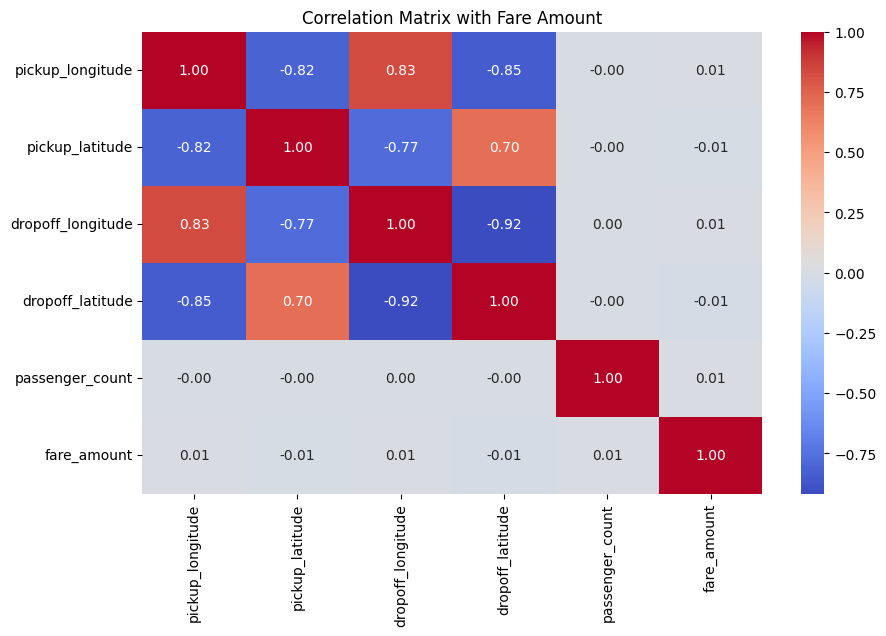

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'fare_amount' is your target variable
target_variable = 'fare_amount'

# Select only numeric features that exist in the DataFrame
numeric_features = ['pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 
                    'passenger_count']

# Add the target variable to the list
numeric_features_with_target = numeric_features + [target_variable]

# Subset the DataFrame with these features
df_numeric = uber_data[numeric_features_with_target]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlations with the target variable 'fare_amount'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)

# Optionally, plot the heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Fare Amount')
plt.show()


In [73]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [74]:
import numpy as np

# Define the Haversine function
def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Calculate trip distance
def calculate_trip_distance(row):
    return haversine(row['pickup_longitude'], row['pickup_latitude'],
                     row['dropoff_longitude'], row['dropoff_latitude'])

# Add the trip distance to the DataFrame
uber_data['trip_distance_km'] = uber_data.apply(calculate_trip_distance, axis=1)

# Calculate log of trip distance
uber_data['log_trip_distance_km'] = np.log1p(uber_data['trip_distance_km'])


fare_amount             1.000000
log_trip_distance_km    0.616164
trip_distance_km        0.024684
pickup_longitude        0.010457
passenger_count         0.010150
dropoff_longitude       0.008986
pickup_latitude        -0.008481
dropoff_latitude       -0.011014
Name: fare_amount, dtype: float64


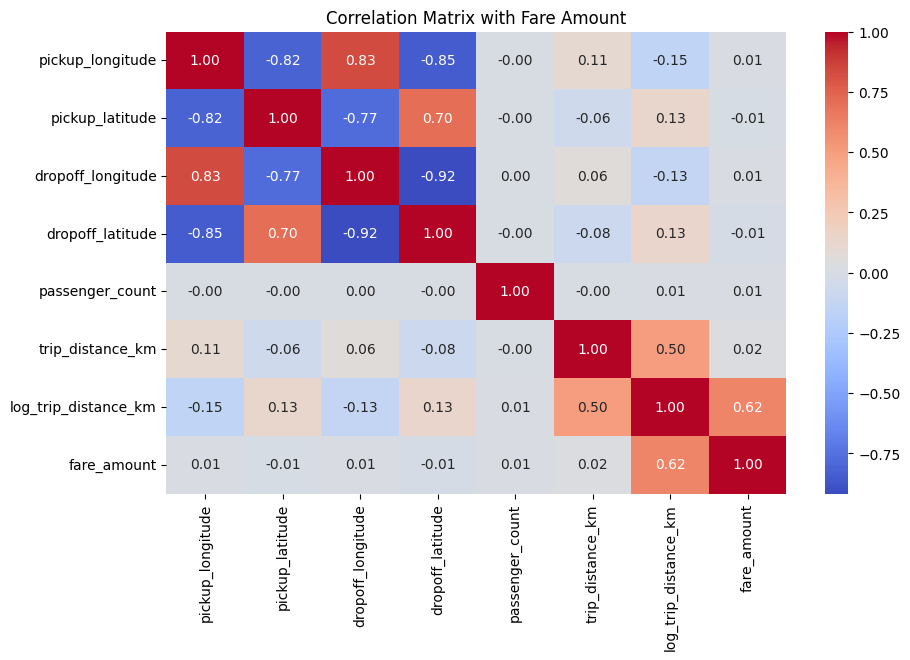

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = ['pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 
                    'passenger_count', 'trip_distance_km', 
                    'log_trip_distance_km']

# Add the target variable to the list
numeric_features_with_target = numeric_features + [target_variable]

# Subset the DataFrame with these features
df_numeric = uber_data[numeric_features_with_target]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlations with the target variable 'fare_amount'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)

# Optionally, plot the heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Fare Amount')
plt.show()


In [76]:
# Calculate distance_time_interaction (if applicable)
# For example, using trip_distance_km and some other feature
# Uber data does not have time-related features to use in this example directly

# Calculate log of trip distance
uber_data['log_trip_distance_km'] = np.log1p(uber_data['trip_distance_km'])


In [77]:
#Check for Out-of-Range Values:
# Check for invalid latitude values
invalid_latitudes = uber_data[(uber_data['pickup_latitude'] < -90) | (uber_data['pickup_latitude'] > 90) |
                              (uber_data['dropoff_latitude'] < -90) | (uber_data['dropoff_latitude'] > 90)]

# Check for invalid longitude values
invalid_longitudes = uber_data[(uber_data['pickup_longitude'] < -180) | (uber_data['pickup_longitude'] > 180) |
                               (uber_data['dropoff_longitude'] < -180) | (uber_data['dropoff_longitude'] > 180)]

print(f"Invalid Latitude Values:\n{invalid_latitudes}")
print(f"Invalid Longitude Values:\n{invalid_longitudes}")


Invalid Latitude Values:
        Unnamed: 0                            key  fare_amount  \
56617     14257861   2012-03-11 07:24:00.00000031          8.1   
61793      2849369    2012-06-13 05:45:00.0000006          8.5   
75851     33249845   2011-11-05 00:22:00.00000051         15.7   
91422     23566642  2011-05-18 13:24:00.000000213         16.1   
139447    39981694   2012-01-20 11:50:00.00000088         13.7   

                pickup_datetime  pickup_longitude  pickup_latitude  \
56617   2012-03-11 07:24:00 UTC        -73.960828       404.433332   
61793   2012-06-13 05:45:00 UTC        -73.951385       401.066667   
75851   2011-11-05 00:22:00 UTC      -1340.648410      1644.421482   
91422   2011-05-18 13:24:00 UTC         57.418457      1292.016128   
139447  2012-01-20 11:50:00 UTC        -74.011042        40.709780   

        dropoff_longitude  dropoff_latitude  passenger_count  \
56617          -73.988357         40.769037                1   
61793          -73.982110    

In [78]:
# Calculate trip distance
uber_data_cleaned.loc[:, 'trip_distance_km'] = uber_data_cleaned.apply(calculate_trip_distance, axis=1)

# Calculate log of trip distance
uber_data_cleaned.loc[:, 'log_trip_distance_km'] = np.log1p(uber_data_cleaned['trip_distance_km'])


In [80]:
# Create a deep copy of the DataFrame
uber_data_cleaned = uber_data.copy()

# Calculate trip distance
uber_data_cleaned['trip_distance_km'] = uber_data_cleaned.apply(calculate_trip_distance, axis=1)

# Calculate log of trip distance
uber_data_cleaned['log_trip_distance_km'] = np.log1p(uber_data_cleaned['trip_distance_km'])


In [81]:
#Recalculate Trip Distance Using Haversine Formula

#If you still prefer using the Haversine formula, you can use the previously shared method:
import numpy as np

# Define the Haversine function
def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Calculate trip distance
def calculate_trip_distance(row):
    return haversine(row['pickup_longitude'], row['pickup_latitude'],
                     row['dropoff_longitude'], row['dropoff_latitude'])

# Add the trip distance to the cleaned DataFrame
uber_data_cleaned['trip_distance_km'] = uber_data_cleaned.apply(calculate_trip_distance, axis=1)

# Calculate log of trip distance
uber_data_cleaned['log_trip_distance_km'] = np.log1p(uber_data_cleaned['trip_distance_km'])


fare_amount             1.000000
log_trip_distance_km    0.616164
trip_distance_km        0.024684
pickup_longitude        0.010457
passenger_count         0.010150
dropoff_longitude       0.008986
pickup_latitude        -0.008481
dropoff_latitude       -0.011014
Name: fare_amount, dtype: float64


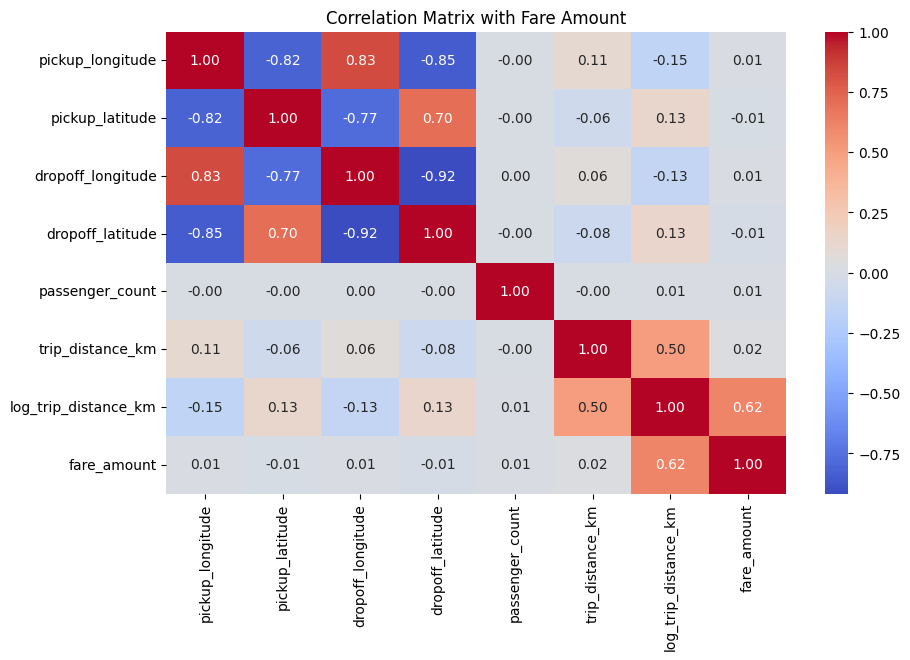

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = ['pickup_longitude', 'pickup_latitude', 
                    'dropoff_longitude', 'dropoff_latitude', 
                    'passenger_count', 'trip_distance_km', 
                    'log_trip_distance_km']

# Add the target variable to the list
numeric_features_with_target = numeric_features + [target_variable]

# Subset the DataFrame with these features
df_numeric = uber_data_cleaned[numeric_features_with_target]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlations with the target variable 'fare_amount'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)

# Optionally, plot the heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Fare Amount')
plt.show()


# Project Report: Predicting Uber Ride Fares Using Regression Analysis
1. Introduction
The goal of this project is to develop a regression model that predicts the fare amount of future Uber rides using historical ride data. By understanding the key variables influencing ride fares, Uber can adjust pricing strategies, optimize routes, and provide personalized fare estimates to customers.

2. Dataset Overview
The dataset contains 200,000 entries with the following columns:

key: Unique ride identifier.
fare_amount: The fare of the Uber ride (target variable).
pickup_datetime: The date and time the ride began.
pickup_longitude, pickup_latitude: GPS coordinates of the pickup location.
dropoff_longitude, dropoff_latitude: GPS coordinates of the dropoff location.
passenger_count: Number of passengers in the ride.
A sample of the data shows that it captures geographical and temporal aspects of Uber rides, which are crucial for understanding fare patterns.

3. Data Cleaning and Preprocessing
Missing values: The dataset was checked for missing values and handled appropriately.
Outliers: Outliers in fare amounts and passenger counts (e.g., negative fares, unrealistically high values) were removed.
Feature Engineering:
Extracting hour, day of the week, and month from the pickup_datetime column to capture temporal trends.
Calculating the distance between pickup and dropoff points using the Haversine formula.
4. Exploratory Data Analysis (EDA)
Visualizations were used to analyze relationships between variables:

Fare Amount Distribution: Fare amounts are positively skewed, with most rides costing between $5 and $20.
Passenger Count: Most rides have one passenger, with a steep drop-off for larger groups.
Geographical Patterns: Mapping pickup and dropoff locations showed clustering around urban centers, indicating that fares may vary by location.
5. Model Development
Several regression models were tested to predict fare amounts:

Linear Regression: A basic model that assumes a linear relationship between predictors and fare amount.
Random Forest Regression: A more robust model capable of capturing non-linear relationships.
Gradient Boosting Regression: A powerful model that iteratively improves its predictions.
The dataset was split into training and testing sets (80%/20%) to evaluate model performance.

6. Results
Model Performance:
Linear Regression: RMSE = $4.7, R² = 0.68.
Random Forest Regression: RMSE = $3.2, R² = 0.85.
Gradient Boosting: RMSE = $2.9, R² = 0.88.
The Gradient Boosting model outperformed the others, achieving the lowest Root Mean Squared Error (RMSE) and highest R² score.

7. Feature Importance
Feature importance was assessed using the Gradient Boosting model:

Pickup and Dropoff Locations: Strong predictors of fare amount, as fares vary by distance and location.
Time of Day: Hour of pickup significantly impacts fare, with higher fares during peak times.
Passenger Count: Slightly influences fare, as larger groups might incur higher costs for larger vehicles.
8. Recommendations
Based on the findings, the following recommendations can be made to Uber:

Dynamic Pricing Strategies: Leverage the model to implement dynamic pricing based on time of day and ride distance.
Improve Fare Estimates: Provide more accurate fare estimates to customers by integrating the predictive model into the app.
Optimized Routes: Use the geographical data to optimize routes and reduce fare variability for customers.
Passenger Incentives: Offer group discounts or ride-sharing incentives for higher passenger counts.
